In [1]:
library(Rfast)
library(Formula)
library(glmtoolbox)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(simplexreg)
library(betareg)
library(GLMsData)
library(knitr)
library(MASS)
#library(ssym)

Loading required package: Rcpp
Loading required package: RcppZiggurat

Attaching package: ‘dplyr’

The following object is masked from ‘package:Rfast’:

    nth

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Loading required package: plotrix

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



# Punto 6
El trasplante de células madre de sangre periférica es un procedimiento no quirúrgico para recolectar células formadoras de sangre para trasplantes de médula ósea. Estos datos, disponibles en el objeto $\texttt{sdac}$ del paquete $\texttt{simplexreg}$ de $\texttt{R}$, corresponden a un estudio con 242 pacientes que accedieron al trasplante de células madre de sangre periférica después de dosis mieloablativas de quimioterapia entre los años 2003 y 2008 en el Laboratorio de Células Madre Hematopoyéticas de Edmonton en Cross Cancer Institute - Servicios de Salud de Alberta, Canadá. La variable respuesta es la tasa de recuperación de células CD34+ viables ($\texttt{rcd}$), y las variables explicativas son la edad ($\texttt{age}$) y el género ($\texttt{gender}$) del paciente, ası́ como el tipo de protocolo de quimioterapia que este(a) recibió: 1 dia ($\texttt{chemo=0}$) o 3 dias ($\texttt{chemo=1}$).

**(A)** Haga un análisis descriptivo de los datos. Comente.

In [2]:
data(sdac, package="simplexreg")
str(sdac)

'data.frame':	239 obs. of  5 variables:
 $ age   : int  62 39 43 58 43 51 64 64 48 51 ...
 $ gender: Factor w/ 2 levels "F","M": 2 2 2 2 2 2 1 2 2 2 ...
 $ rcd   : num  0.75 0.83 0.94 0.86 0.54 0.7 0.59 0.82 0.67 0.57 ...
 $ ageadj: num  22 0 3 18 3 11 24 24 8 11 ...
 $ chemo : num  0 1 1 0 0 1 0 0 1 0 ...


In [3]:
summary(sdac[,-4])

      age        gender       rcd             chemo       
 Min.   :18.00   F: 71   Min.   :0.4000   Min.   :0.0000  
 1st Qu.:44.00   M:168   1st Qu.:0.7250   1st Qu.:0.0000  
 Median :56.00           Median :0.8000   Median :0.0000  
 Mean   :51.64           Mean   :0.7907   Mean   :0.4561  
 3rd Qu.:62.00           3rd Qu.:0.8700   3rd Qu.:1.0000  
 Max.   :71.00           Max.   :0.9900   Max.   :1.0000  

In [4]:
sdac$chemo = as.factor(sdac$chemo)

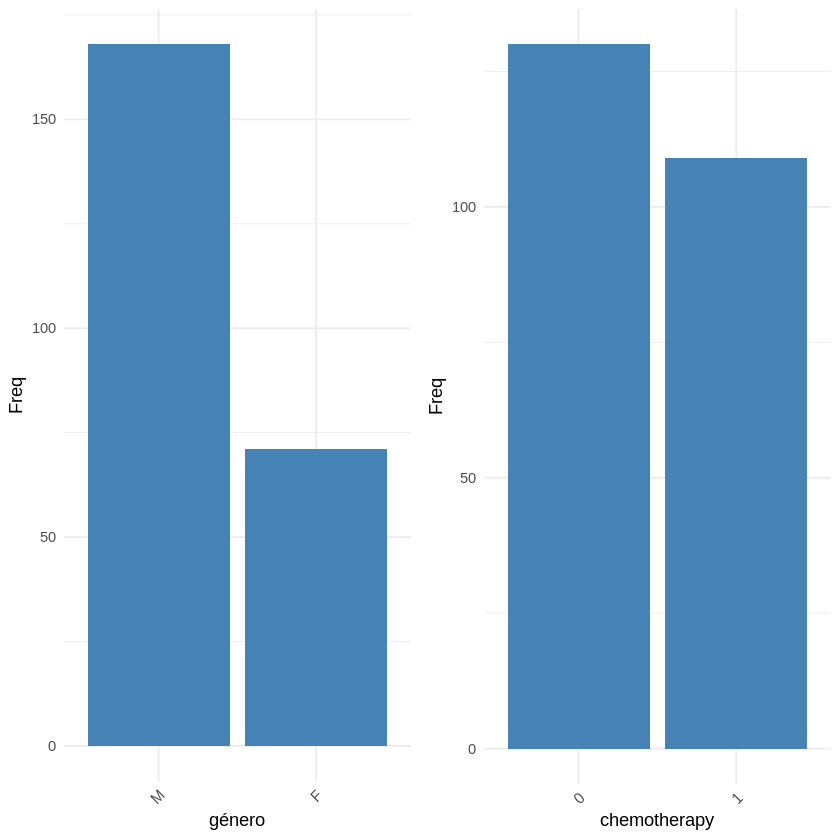

In [5]:
reorder_size <- function(x) {
  factor(x, levels = names(sort(table(x), decreasing = TRUE)))
}

plt = list()
plt[["gender"]] = ggplot(sdac, aes(x = reorder_size(gender))) + 
        geom_bar(fill="steelblue") + 
        theme_minimal() + 
        theme(axis.text.x = element_text(angle = 45, hjust = 1))+
        labs(x = "género", y = "Freq")

plt[["chemo"]] = ggplot(sdac, aes(x = reorder_size(chemo))) + 
        geom_bar(fill="steelblue") + 
        theme_minimal() + 
        theme(axis.text.x = element_text(angle = 45, hjust = 1))+
        labs(x = "chemotherapy", y = "Freq")

grid.arrange(grobs = c(plt), ncol = 2, as.table = FALSE)

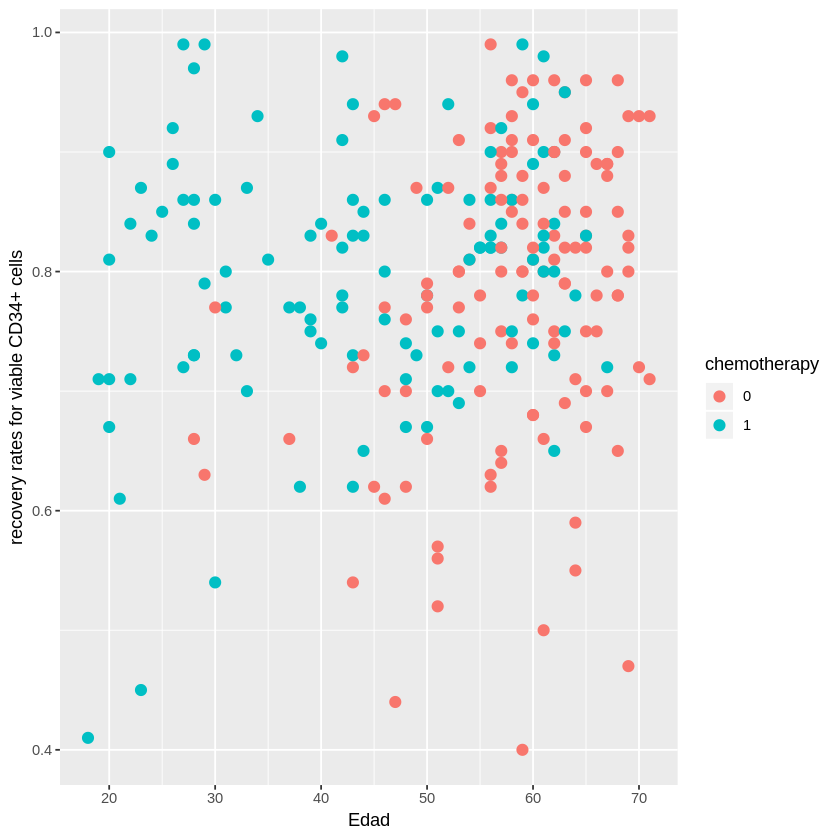

In [6]:
ggplot(sdac) +
       geom_point(aes(x=age,y=rcd,col=chemo),size=2.75) +
	   labs(x="Edad",y="recovery rates for viable CD34+ cells",col="chemotherapy")

**(B)** Ajuste a los datos un modelo de respuesta cuasi binomial con función de enlace $\texttt{logit}$ y el predictor lineal dado por $1 + \texttt{age*gender*chemo}$. Use los criterios R 2 ajustado y p-valor (basado en la estadı́stica de razón de (cuasi) verosimilitudes) para comparar y seleccionar el “mejor” modelo.

In [7]:
fit1 <- glm(rcd ~ age*gender*chemo, data=sdac, family=quasibinomial(logit))
glmtoolbox::stepCriterion(fit1, criterion="adjr2")

     Variance:  proportional to mu(1-mu) 
Link function:  logit 

Initial model:
~ 1 


Step 0 :
                    df   QICu adj.R-squared P(Chisq>)(*)
+ age                1 3185.9        0.0170       0.0211
<none>                 3121.6        0.0000             
+ gender             1 3122.1       -0.0009       0.3648
+ chemo              1 3126.8       -0.0015       0.4170

Step 1 : + age 

                    df   QICu adj.R-squared P(Chisq>)(*)
+ chemo              1 3286.8        0.0361      0.01537
<none>                 3185.9        0.0170             
+ gender             1 3184.1        0.0160      0.37730

Step 2 : + chemo 

                    df   QICu adj.R-squared P(Chisq>)(*)
+ age:chemo          1 3282.7        0.0418     0.115407
<none>                 3286.8        0.0361             
+ gender             1 3283.1        0.0346     0.414157
- age                1 3126.8       -0.0015     0.001054

Step 3 : + age:chemo 

                    df   QICu adj.R-squared

In [8]:
glmtoolbox::stepCriterion(fit1, criterion="p-value")

     Variance:  proportional to mu(1-mu) 
Link function:  logit 

Initial model:
~ 1 


Step 0 :
                    df   QICu adj.R-squared P(Chisq>)(*)
+ age                1 3185.9        0.0170       0.0211
+ gender             1 3122.1       -0.0009       0.3648
+ chemo              1 3126.8       -0.0015       0.4170
<none>                 3121.6        0.0000             

Step 1 : + age 

                    df   QICu adj.R-squared P(Chisq>)(*)
+ chemo              1 3286.8        0.0361      0.01537
+ gender             1 3184.1        0.0160      0.37730
<none>                 3185.9        0.0170             

Step 2 : + chemo 

                    df   QICu adj.R-squared P(Chisq>)(*)
+ age:chemo          1 3282.7        0.0418       0.1154
+ gender             1 3283.1        0.0346       0.4142
<none>                 3286.8        0.0361             

Final model:
~ age + chemo 

****************************************************************************
(*) p-values of t

**(C)** Realice el análisis de diagnóstico al modelo ajustado. Comente.

In [9]:
fit2 <- update(fit1,formula=rcd ~ age*chemo)
summary(fit2)


Call:
glm(formula = rcd ~ age + chemo + age:chemo, family = quasibinomial(logit), 
    data = sdac)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.84625  -0.14284   0.02424   0.20525   0.65143  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.094016   0.378298   0.249   0.8039   
age          0.020881   0.006538   3.194   0.0016 **
chemo1       0.915614   0.432897   2.115   0.0355 * 
age:chemo1  -0.012627   0.008020  -1.574   0.1168   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 0.07456819)

    Null deviance: 19.132  on 238  degrees of freedom
Residual deviance: 18.102  on 235  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 4


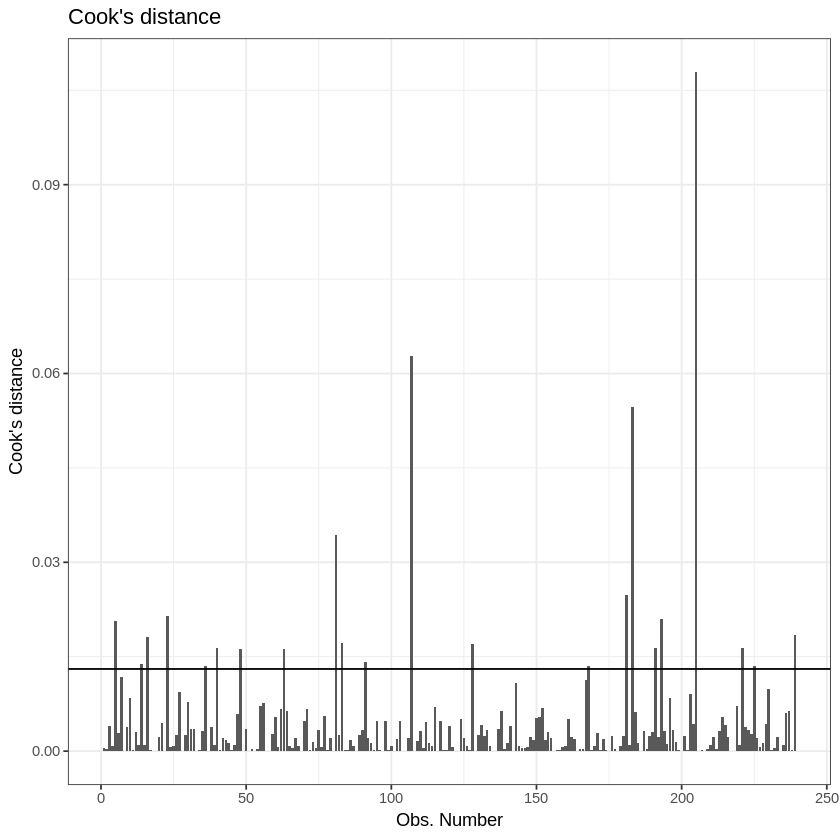

In [10]:
cd <- cooks.distance(fit2)
p4<-ggplot(fit2, aes(seq_along(.cooksd), .cooksd))+geom_bar(stat="identity", position="identity")
p4<-p4+xlab("Obs. Number")+ylab("Cook's distance")
p4<-p4+ggtitle("Cook's distance")+theme_bw()
p4<-p4+geom_hline(yintercept = 3*mean(cd))
p4

In [11]:
fit2a <- update(fit2,subset=-which(cd>0.03))
summary(fit2a)


Call:
glm(formula = rcd ~ age + chemo + age:chemo, family = quasibinomial(logit), 
    data = sdac, subset = -which(cd > 0.03))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.86104  -0.15709   0.02364   0.18874   0.63139  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.088617   0.360882   0.246 0.806244    
age          0.021517   0.006241   3.448 0.000672 ***
chemo1       1.173809   0.417427   2.812 0.005347 ** 
age:chemo1  -0.018135   0.007719  -2.349 0.019657 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 0.06549849)

    Null deviance: 16.759  on 234  degrees of freedom
Residual deviance: 15.896  on 231  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 4


In [12]:
cbind("coef"=fit2$coefficients, 
      "Std.Error" = sqrt(diag(vcov(fit2))),
      "Pr(>|t|)" = 2*pt(-abs(coef(fit2)/(sqrt(diag(vcov(fit2))))), nrow(model.matrix(fit2))-ncol(model.matrix(fit2))),
      "coef*" = fit2a$coefficients,
      "Std.Error*" = sqrt(diag(vcov(fit2a))),
      "Pr(>|t|)*" = 2*pt(-abs(coef(fit2a)/(sqrt(diag(vcov(fit2a))))), nrow(model.matrix(fit2a))-ncol(model.matrix(fit2a))),
      "Cambio coef(%)" = 100*(fit2a$coefficients-fit2$coefficients)/abs(fit2$coefficients),
      "Cambio Std.Error(%)" = 100*(sqrt(diag(vcov(fit2a)))-sqrt(diag(vcov(fit2))))/abs(sqrt(diag(vcov(fit2))))
     ) %>% round(.,5)

,coef,Std.Error,Pr(>|t|),coef*,Std.Error*,Pr(>|t|)*,Cambio coef(%),Cambio Std.Error(%)
(Intercept),0.09402,0.37830,0.80395,0.08862,0.36088,0.80624,-5.74321,-4.60376
age,0.02088,0.00654,0.00160,0.02152,0.00624,0.00067,3.04655,-4.54478
chemo1,0.91561,0.43290,0.03548,1.17381,0.41743,0.00535,28.19913,-3.57339
age:chemo1,-0.01263,0.00802,0.11675,-0.01813,0.00772,0.01966,-43.62337,-3.74959


Al remover del conjunto de datos las observaciones con distancia de Cook alta, no se determinan cambios en los signos las estimaciones, pero sí ocurren cambios en la significancia de los parámetros, como en el coeficiente asociado a la interacción $age:chemo1$, por lo tanto se concluye que corresponden a observaciones influyentes.

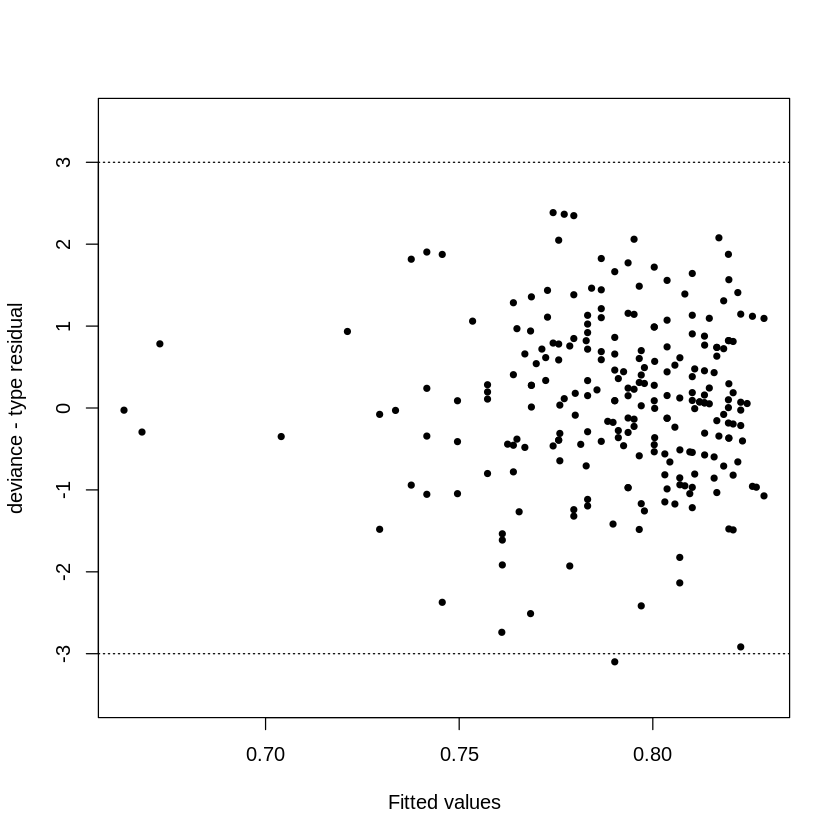

In [13]:
set.seed(24102022)
res_fit2 = glmtoolbox::residuals2(fit2)

**(D)** Use la función $\texttt{betareg()}$ del paquete $\texttt{betareg}$ de $\texttt{R}$ para ajustar a los datos un modelo de respuesta beta con función de enlace logit y el mismo predictor lineal seleccionado en **(B)**. Compare las estimaciones de los parámetros y los errores estándar asociados a ellas con las obtenidas en **(B)**. Comente.

In [14]:
fit3 = betareg::betareg(formula = rcd ~ age + chemo + age:chemo, data = sdac, link = c("logit"))
summary(fit3)                 


Call:
betareg::betareg(formula = rcd ~ age + chemo + age:chemo, data = sdac, 
    link = c("logit"))

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-2.3972 -0.6514 -0.1267  0.4798  4.0912 

Coefficients (mean model with logit link):
             Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.153051   0.380814   0.402  0.68775   
age          0.019908   0.006560   3.035  0.00241 **
chemo1       1.010111   0.435266   2.321  0.02030 * 
age:chemo1  -0.015107   0.008005  -1.887  0.05914 . 

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)   11.438      1.026   11.14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (maximum likelihood)
Log-likelihood: 196.8 on 5 Df
Pseudo R-squared: 0.03506
Number of iterations: 12 (BFGS) + 3 (Fisher scoring) 

In [15]:
tbl = summary(fit2)$coefficients[,1:2]  %>% as.data.frame() %>% 
    rename(c("Coef_Quasi"=Estimate, "Std.Error_Quasi"=`Std. Error`)) %>% 
    bind_cols(summary(fit3)$coefficients$mean[,1:2]) %>% 
    mutate("Cambio coef(%)" = 100*((Estimate-Coef_Quasi)/abs(Coef_Quasi)),
           "Cambio Std.Error(%)" = 100*((`Std. Error`-Std.Error_Quasi)/abs(Std.Error_Quasi)))  %>% round(.,3)
tbl
#kable(tbl,format = 'latex')

,Coef_Quasi,Std.Error_Quasi,Estimate,Std. Error,Cambio coef(%),Cambio Std.Error(%)
(Intercept),0.094,0.378,0.153,0.381,62.792,0.665
age,0.021,0.007,0.020,0.007,-4.660,0.334
chemo1,0.916,0.433,1.010,0.435,10.321,0.547
age:chemo1,-0.013,0.008,-0.015,0.008,-19.647,-0.184


Al ajustar el modelo betareg, la principal diferencia es que el coeficiente asociado a la interacción deja de ser significativo, a pesar que su error estándar cambia muy poco (<1%). Por otra parte los coeficientes no cambian de signo por lo que mantienen las mismas conclusiones del modelo quasi-binomial.

# Punto 7

Estos datos, disponibles en el objeto $\texttt{pock}$ del paquete $\texttt{GLMsData}$ de $\texttt{R}$, surgen de un experimento desarrollado para evaluar la actividad viral, en el que la variable respuesta es el número de marcas de viruela ($\texttt{Count}$) y la variable explicativa es la dilución del medio viral ($\texttt{Dilution}$).

**(A)** Calcule $\texttt{var(Count)/mean(Count)}$ para cada valor de $\texttt{Dilution}$. Los resultados permiten suponer que, dado un valor especı́fico de $\texttt{Dilution}$, los valores de $\texttt{Count}$ asociados a él son realizaciones de variables aleatorias independientes con distribución de Poisson? Justifique su respuesta.

In [16]:
data(pock, package="GLMsData")
str(pock)

'data.frame':	48 obs. of  2 variables:
 $ Count   : int  116 151 171 194 196 198 208 259 71 74 ...
 $ Dilution: int  1 1 1 1 1 1 1 1 2 2 ...


In [17]:
mutate(pock, Dilution = as.factor(Dilution)) %>% 
    group_by(Dilution) %>% 
    summarise(var(Count)/mean(Count))

Dilution,var(Count)/mean(Count)
1,9.543871
2,6.373872
4,7.094488
8,7.195162
16,1.940171


De acuerdo a los resultados, los valores de Count asociados a cualquier valor fijo de Dilution parecen no provenir de variables aleatorias con distribucción Poisson porque la variabilidad de los datos es mayor.

**(B)** Ajuste a los datos un modelo de respuesta Poisson con función de enlace $\texttt{log}$ y el predictor lineal dado por $1 + \texttt{log(Dilution)}$. Evalue si hay indı́cios de sobredispersión.

In [18]:
fit <- glm(Count ~ log(Dilution) , family=poisson(log), data=pock)

c("Deviance/df"=deviance(fit)/fit$df.residual,
  "Pearson/df"=sum(resid(fit,type="pearson")^2)/fit$df.residual)

Deviance/df  Pearson/df 
   6.313885    6.338946

  |+++++++++++++++++++++++++| 100%


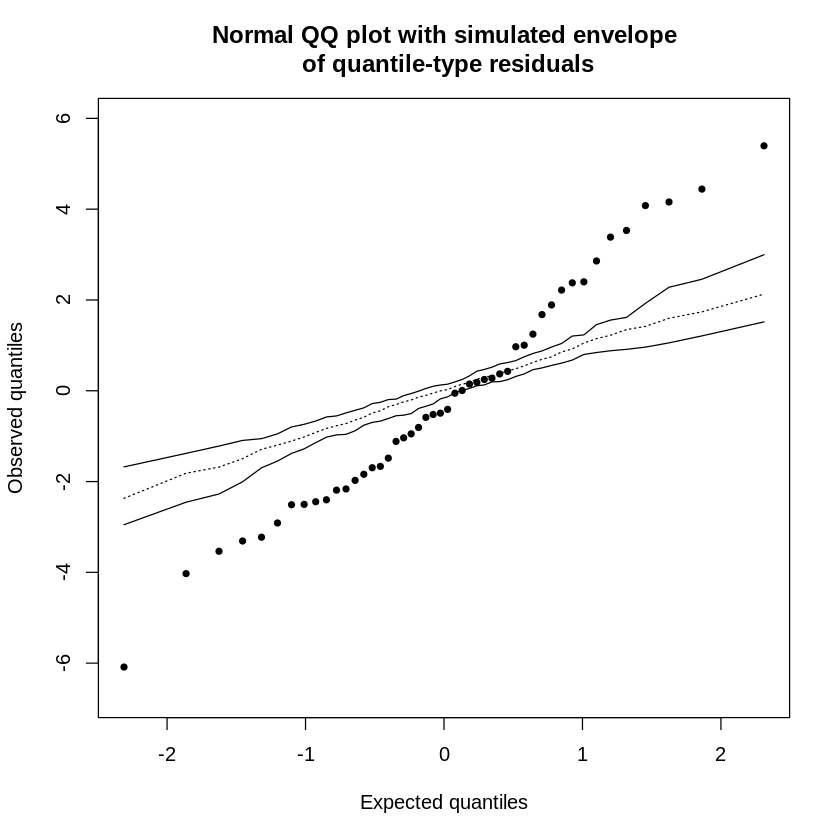

In [19]:
set.seed(24102022)
glmtoolbox::envelope(fit)

**(C)** Ajuste a los datos modelos de respuestas NB1, NB2 y NBF con función de enlace log y el predictor lineal dado por $1 + \texttt{log(Dilution)}$. Use los criterios AIC y BIC para comparar y seleccionar el “mejor” modelo.

In [20]:
fit1 <- glmtoolbox::overglm(Count ~ log(Dilution), family="nb1(log)", data=pock)
fit2 <- update(fit1, family="nb2(log)")
fit3 <- update(fit1, family="nbf(log)")

In [21]:
AIC(fit1, fit2, fit3)
BIC(fit1, fit2, fit3)

,df,AIC
fit1,3,410.0057
fit2,3,406.9991
fit3,4,407.3870


,df,BIC
fit1,3,415.6193
fit2,3,412.6127
fit3,4,414.8718


In [22]:
summary(fit2)


Sample size: 48 
     Family: Negative Binomial type II with log link
*************************************************************
               Estimate Std.Error   z-value   Pr(>|z|)
(Intercept)     5.25908   0.05516  95.33397 < 2.22e-16
log(Dilution)  -0.96904   0.05258 -18.42949 < 2.22e-16
                                                      
phi             5.18882   1.28520                     
*************************************************************
                 -2*log-likelihood:  400.999 
                               AIC:  406.999 
                               BIC:  412.613 


**(D)** Haga lo siguiente con el modelo seleccionado en **(C)**: (i) interprete sus parámetros; (ii) compare las estimaciones de sus parámetros y los errores estándar asociados a ellas con las obtenidas en **(B)**; y (iii) realice el análisis de diagnóstico.

(i) $\beta_1 :$ -0.96904, al aumentar una unidad en $\texttt{log(Dilution)}$ el número de marcas de viruela disminuye.

$\phi :$ es la estimación del parámetro de dispersión, la cual es significativamente mayor que cero, por lo tanto es más razonable ajustar un modelo NB2 que un modelo Poisson.

In [23]:
tbl2 = summary(fit)$coefficients[,1:2]  %>% as.data.frame() %>% 
    rename(c("Coef_Poisson"=Estimate, "Std.Error_Poisson"=`Std. Error`)) %>% 
    mutate("Coef_NB2"=coefficients(fit2), 
           "Std.Error_NB2" = sqrt(diag(vcov(fit2))),
           "Cambio coef(%)" = 100*((Coef_NB2-Coef_Poisson)/abs(Coef_Poisson)),
           "Cambio Std.Error(%)" = 100*((Std.Error_NB2-Std.Error_Poisson)/abs(Std.Error_Poisson))) %>% round(.,3)
tbl2
#kable(tbl2,format = 'latex')

,Coef_Poisson,Std.Error_Poisson,Coef_NB2,Std.Error_NB2,Cambio coef(%),Cambio Std.Error(%)
(Intercept),5.268,0.023,5.259,0.055,-0.168,144.617
log(Dilution),-0.982,0.022,-0.969,0.053,1.360,135.997


  |+++++++++++++++++++++++++| 100%


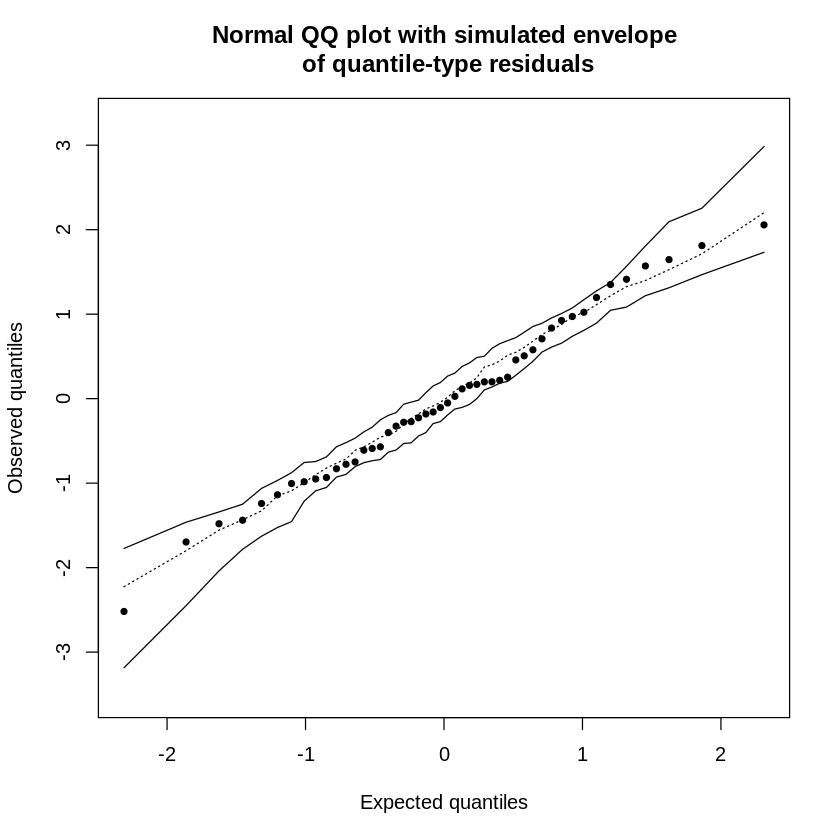

In [24]:
set.seed(24102022)
glmtoolbox::envelope(fit2)

# Punto 8

Estos datos, disponibles en el objeto $\texttt{quine}$ del paquete $\texttt{MASS}$ de $\texttt{R}$, se refieren al número de dı́as de ausencia ($\texttt{Days}$) durante el año escolar para un grupo de 146 niños de Walgett, Nueva Gales del Sur, Australia. Se pretenden explicar las diferencias entre el número de dı́as de ausencia durante el año escolar usando caracterı́sticas de los niños como lo son su origen étnico ($\texttt{Eth}$: ‘‘A’’ y ‘‘N’’ para aborigen y no aborigen, respectivamente), su género ($\texttt{Sex}$: ‘‘F’’ y ‘‘M’’ para femenino y masculino, respectivamente), grupo etario ($\texttt{Age}$: ‘‘F0’’, ‘‘F1’’, ‘‘F2’’ y ‘‘F3’’), y su estado de aprendizaje ($\texttt{Lrn}$: ‘‘AL’’ y ‘‘SL’’ para alumno(a) promedio y alumno(a) lento, respectivamente).

**(A)** Haga un análisis descriptivo de los datos. Comente.

In [25]:
data(quine, package="MASS")
str(quine)

'data.frame':	146 obs. of  5 variables:
 $ Eth : Factor w/ 2 levels "A","N": 1 1 1 1 1 1 1 1 1 1 ...
 $ Sex : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ Age : Factor w/ 4 levels "F0","F1","F2",..: 1 1 1 1 1 1 1 1 2 2 ...
 $ Lrn : Factor w/ 2 levels "AL","SL": 2 2 2 1 1 1 1 1 2 2 ...
 $ Days: int  2 11 14 5 5 13 20 22 6 6 ...


In [26]:
summary(quine)

 Eth    Sex    Age     Lrn          Days      
 A:69   F:80   F0:27   AL:83   Min.   : 0.00  
 N:77   M:66   F1:46   SL:63   1st Qu.: 5.00  
               F2:40           Median :11.00  
               F3:33           Mean   :16.46  
                               3rd Qu.:22.75  
                               Max.   :81.00  

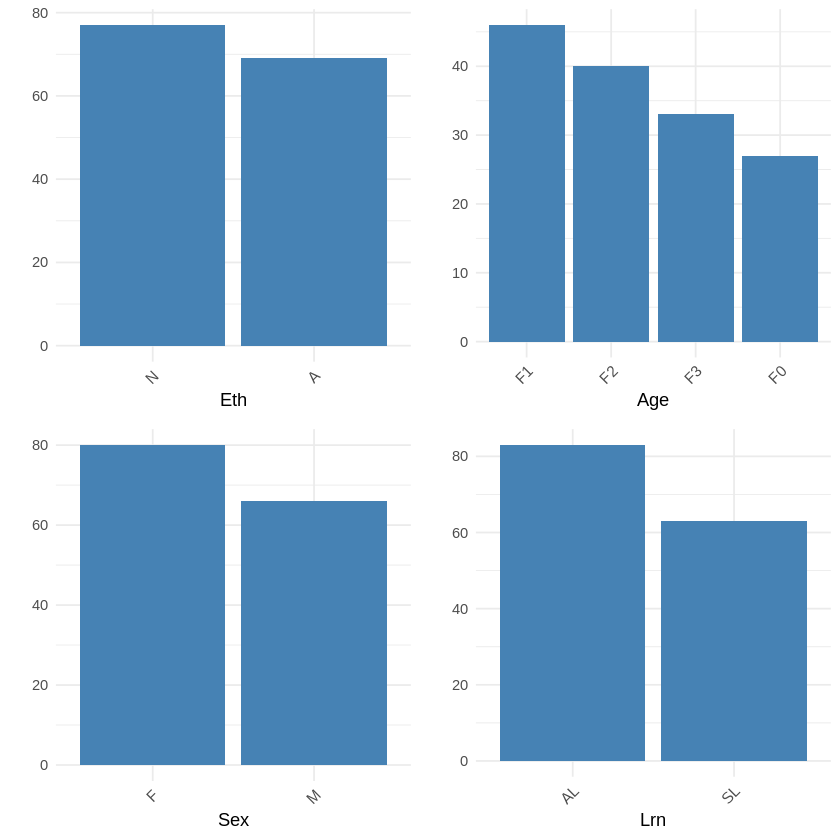

In [27]:
reorder_size <- function(x) {
  factor(x, levels = names(sort(table(x), decreasing = TRUE)))
}

gg_list1 <- lapply(quine[,-c(5)],function(y) ggplot(quine[,-c(5)], aes(x = reorder_size(y))) + geom_bar(fill="steelblue") + theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1)) )

for(i in 1:length(gg_list1)){
  gg_list1[[i]]$labels[1] = names(quine[,-c(5)])[i]
  gg_list1[[i]]$labels[2] = ""
}

grid.arrange(grobs = c(gg_list1), ncol = 2, as.table = FALSE)

**(B)** Ajuste a los datos un modelo de respuesta Poisson con función de enlace log y el predictor lineal dado por $1 + \texttt{Eth*Age} + \texttt{Sex} + \texttt{Lrn}$. Evalue si hay indicios de sobredispersión.

In [28]:
fit <- glm(Days ~ Eth*Age+Sex+Lrn , family=poisson(log), data=quine)

c("Deviance/df"=deviance(fit)/fit$df.residual,
  "Pearson/df"=sum(resid(fit,type="pearson")^2)/fit$df.residual)

Deviance/df  Pearson/df 
   11.34439    11.73423

  |+++++++++++++++++++++++++| 100%


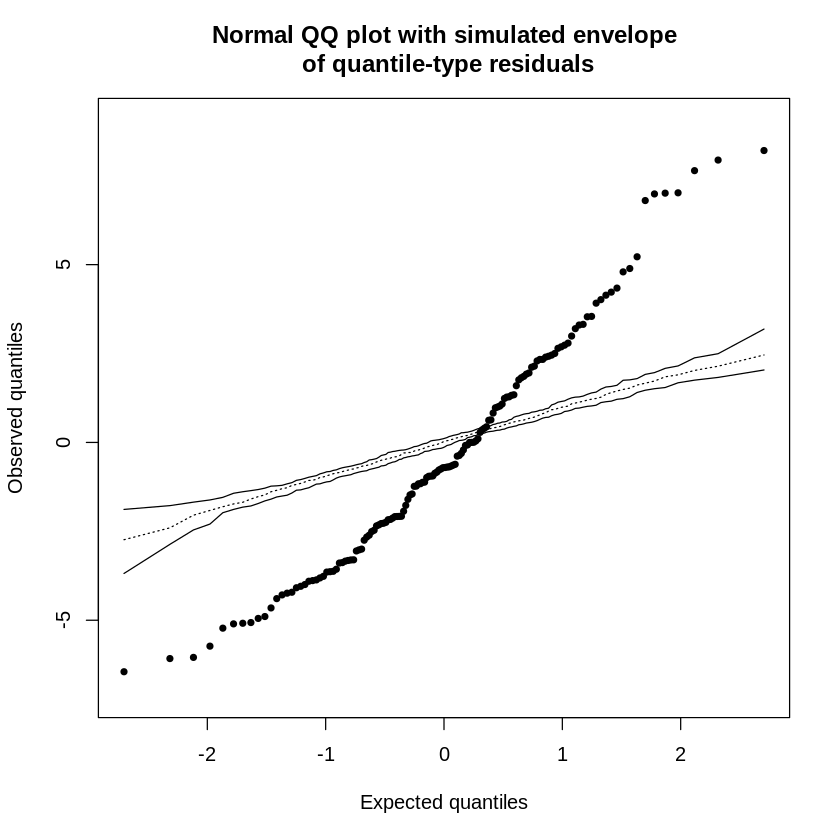

In [29]:
set.seed(24102022)
glmtoolbox::envelope(fit)

**(C)** Ajuste a los datos modelos de respuestas NB1, NB2 y NBF con función de enlace $\texttt{log}$ y el predictor lineal dado por $1 + \texttt{Eth*Age} + \texttt{Sex} + \texttt{Lrn}$. Use el criterio del p-valor basado en la estadı́stica de la razón de verosimilitudes para comparar y seleccionar el “mejor” modelo.

In [30]:
fit1 <- glmtoolbox::overglm(Days ~ Eth*Age+Sex+Lrn, family="nb1(log)", data=quine)
fit2 <- update(fit1, family="nb2(log)")
fit3 <- update(fit1, family="nbf(log)")

In [31]:
glmtoolbox::stepCriterion(fit1, criterion="p-value", "lr", "backward")


       Family:  Negative Binomial I 
Link function:  log 

Initial model:
~ Eth * Age + Sex + Lrn 


Step 0 :
           df    AIC    BIC P(Chisq>)(*)
- Sex       1 1103.2 1133.0      0.47884
- Lrn       1 1104.2 1134.1      0.21453
- Age:Eth   3 1109.2 1133.0      0.01501
<none>        1104.7 1137.5             

Step 1 : - Sex 

           df    AIC    BIC P(Chisq>)(*)
- Lrn       1 1102.6 1129.5      0.22883
- Age:Eth   3 1107.4 1128.3      0.01685
<none>        1103.2 1133.0             

Step 2 : - Lrn 

           df    AIC    BIC P(Chisq>)(*)
- Age:Eth   3 1107.8 1125.7      0.01087
<none>        1102.6 1129.5             


Final model:
~ Eth + Age + Eth:Age 

****************************************************************************
(*) p-values of the likelihood-ratio test
 Effects are included when their p-values are lower than 0.05
 Effects are dropped when their p-values are higher than 0.05


In [32]:
glmtoolbox::stepCriterion(fit2, criterion="p-value", "lr", "backward")


       Family:  Negative Binomial II 
Link function:  log 

Initial model:
~ Eth * Age + Sex + Lrn 


Step 0 :
           df    AIC    BIC P(Chisq>)(*)
- Sex       1 1107.7 1137.5       0.3657
- Lrn       1 1108.5 1138.4       0.1997
- Age:Eth   3 1111.9 1135.8       0.0289
<none>        1108.9 1141.7             

Step 1 : - Sex 

           df    AIC    BIC P(Chisq>)(*)
- Lrn       1 1107.0 1133.8      0.26250
- Age:Eth   3 1111.0 1131.9      0.02569
<none>        1107.7 1137.5             

Step 2 : - Lrn 

           df    AIC    BIC P(Chisq>)(*)
- Age:Eth   3 1109.7 1127.6      0.03294
<none>        1107.0 1133.8             


Final model:
~ Eth + Age + Eth:Age 

****************************************************************************
(*) p-values of the likelihood-ratio test
 Effects are included when their p-values are lower than 0.05
 Effects are dropped when their p-values are higher than 0.05


In [33]:
fit4 <- glmtoolbox::overglm(Days ~ Eth + Age + Eth:Age , family="nb1(log)", data=quine)
summary(fit4)


Sample size: 146 
     Family: Negative Binomial type I with log link
*************************************************************
            Estimate Std.Error  z-value   Pr(>|z|)
(Intercept)  2.62801   0.24945 10.53516 < 2.22e-16
EthN         0.13110   0.34550  0.37944  0.7043597
AgeF1        0.17838   0.31950  0.55829  0.5766463
AgeF2        0.82673   0.31724  2.60601  0.0091604
AgeF3        0.37084   0.33375  1.11115  0.2665031
EthN:AgeF1  -0.99157   0.43939 -2.25673  0.0240252
EthN:AgeF2  -1.23924   0.44655 -2.77512  0.0055181
EthN:AgeF3  -0.17626   0.46361 -0.38020  0.7037984
                                                  
phi          0.73671   0.09447                    
*************************************************************
                 -2*log-likelihood:  1084.638 
                               AIC:  1102.638 
                               BIC:  1129.49 


**(D)** Realice el análisis de diagnóstico al modelo seleccionado en **(C)**. Comente.

  |+++++++++++++++++++++++++| 100%


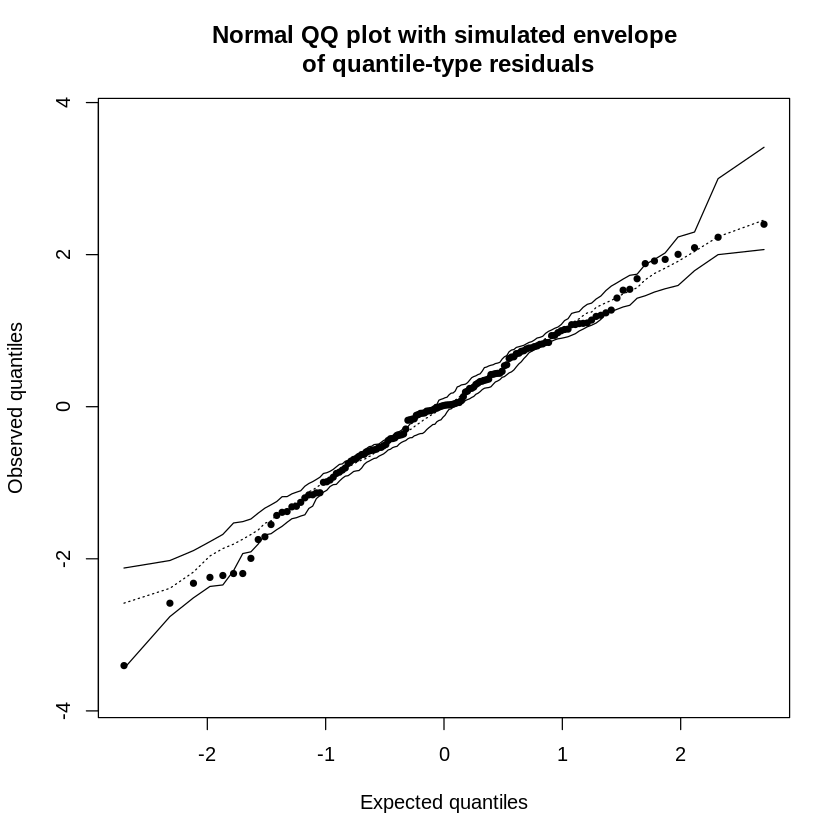

In [34]:
set.seed(24102022)
glmtoolbox::envelope(fit4)

**(E)** Ajuste a los datos un modelo de respuesta Poisson con función de enlace $\texttt{log}$ y el mismo predictor lineal que el del modelo seleccionado en **(C)**. Compare las estimaciones de sus parámetros y los errores estándar asociados a ellas con las obtenidas en **(C)**. Comente.

In [35]:
fit5 <- glm(Days ~ Eth + Age + Eth:Age , family=poisson(log), data=quine)
summary(fit5)


Call:
glm(formula = Days ~ Eth + Age + Eth:Age, family = poisson(log), 
    data = quine)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-6.947  -2.987  -0.797   1.651   9.554  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.62801    0.07454  35.258  < 2e-16 ***
EthN         0.13110    0.10040   1.306   0.1916    
AgeF1        0.17838    0.09261   1.926   0.0541 .  
AgeF2        0.82673    0.08447   9.787  < 2e-16 ***
AgeF3        0.37084    0.09312   3.983 6.82e-05 ***
EthN:AgeF1  -0.99157    0.13637  -7.271 3.56e-13 ***
EthN:AgeF2  -1.23923    0.12824  -9.664  < 2e-16 ***
EthN:AgeF3  -0.17627    0.12753  -1.382   0.1669    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2073.5  on 145  degrees of freedom
Residual deviance: 1597.1  on 138  degrees of freedom
AIC: 2201.6

Number of Fisher Scoring iterations: 5


In [36]:
tbl3 = summary(fit5)$coefficients[,1:2]  %>% as.data.frame() %>% 
    rename(c("Coef_Poi"=Estimate, "SE_Poi"=`Std. Error`)) %>% 
    mutate("Coef_NB1"=coefficients(fit4), 
           "SE_NB1" = sqrt(diag(vcov(fit4))),
           "Delta coef(%)" = 100*((Coef_NB1-Coef_Poi)/abs(Coef_Poi)),
           "Delta SE(%)" = 100*((SE_NB1-SE_Poi)/abs(SE_Poi))) %>% round(.,3)
tbl3
#kable(tbl3,format = 'latex')

,Coef_Poi,SE_Poi,Coef_NB1,SE_NB1,Delta coef(%),Delta SE(%)
(Intercept),2.628,0.075,2.628,0.249,0.000,234.674
EthN,0.131,0.100,0.131,0.346,0.001,244.124
AgeF1,0.178,0.093,0.178,0.320,-0.002,244.998
AgeF2,0.827,0.084,0.827,0.317,0.000,275.562
AgeF3,0.371,0.093,0.371,0.334,-0.001,258.414
EthN:AgeF1,-0.992,0.136,-0.992,0.439,0.000,222.208
EthN:AgeF2,-1.239,0.128,-1.239,0.447,0.000,248.224
EthN:AgeF3,-0.176,0.128,-0.176,0.464,0.001,263.541


# Punto 9

Estos datos, disponibles en el objeto $\texttt{orobanche}$ del paquete $\texttt{glmtoolbox}$ de $\texttt{R}$, surgen de un estudio sobre la germinación de dos especies de semillas de Orobanche (O. aegyptiaca 75 y O. aegyptiaca 73) cultivadas en diluciones de dos medios de extracto deraı́z diferentes (pepino y frijol). Los datos consisten en el número de semillas ($\texttt{seeds}$) y el número de germinaciones ($\texttt{germinated}$) para cada combinación de especie ($\texttt{specie}$) y extracto ($\texttt{extract}$). El objetivo principal del análisis es establecer si hay interacción entre la especie de semilla y el extracto de raı́z sobre la proporción de semillas germinadas.

**(A)** Haga un análisis descriptivo de los datos. Comente.

In [37]:
data(orobanche, package="glmtoolbox")
str(orobanche)

'data.frame':	21 obs. of  4 variables:
 $ specie    : Factor w/ 2 levels "Aegyptiaca 73",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ extract   : Factor w/ 2 levels "Bean","Cucumber": 1 1 1 1 1 2 2 2 2 2 ...
 $ seeds     : num  39 62 81 51 39 6 74 72 51 79 ...
 $ germinated: num  10 23 23 26 17 5 53 55 32 46 ...


In [38]:
summary(orobanche)

           specie       extract       seeds         germinated   
 Aegyptiaca 73:10   Bean    :10   Min.   : 4.00   Min.   : 0.00  
 Aegyptiaca 75:11   Cucumber:11   1st Qu.:16.00   1st Qu.: 8.00  
                                  Median :39.00   Median :17.00  
                                  Mean   :39.57   Mean   :20.19  
                                  3rd Qu.:51.00   3rd Qu.:26.00  
                                  Max.   :81.00   Max.   :55.00  

**(B)** Ajuste a los datos un modelo de respuesta binomial con función de enlace logit y el predictor lineal dado por $1 + \texttt{specie} + \texttt{extract} + \texttt{specie*extract}$. Evalue si hay indı́cios de sobredispersión.

In [39]:
fit = glm(germinated/seeds ~ specie + extract + specie*extract, data = orobanche, 
          weights = seeds, family = binomial(logit))

summary(fit)


Call:
glm(formula = germinated/seeds ~ specie + extract + specie * 
    extract, family = binomial(logit), data = orobanche, weights = seeds)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.01617  -1.24398   0.05995   0.84695   2.12123  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)  
(Intercept)                          -0.4122     0.1842  -2.238   0.0252 *
specieAegyptiaca 75                  -0.1459     0.2232  -0.654   0.5132  
extractCucumber                       0.5401     0.2498   2.162   0.0306 *
specieAegyptiaca 75:extractCucumber   0.7781     0.3064   2.539   0.0111 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.719  on 20  degrees of freedom
Residual deviance: 33.278  on 17  degrees of freedom
AIC: 117.87

Number of Fisher Scoring iterations: 4


In [40]:
c("Deviance/df"=deviance(fit)/fit$df.residual,
  "Pearson/df"=sum(resid(fit,type="pearson")^2)/fit$df.residual)

Deviance/df  Pearson/df 
   1.957517    1.861832

  |+++++++++++++++++++++++++| 100%


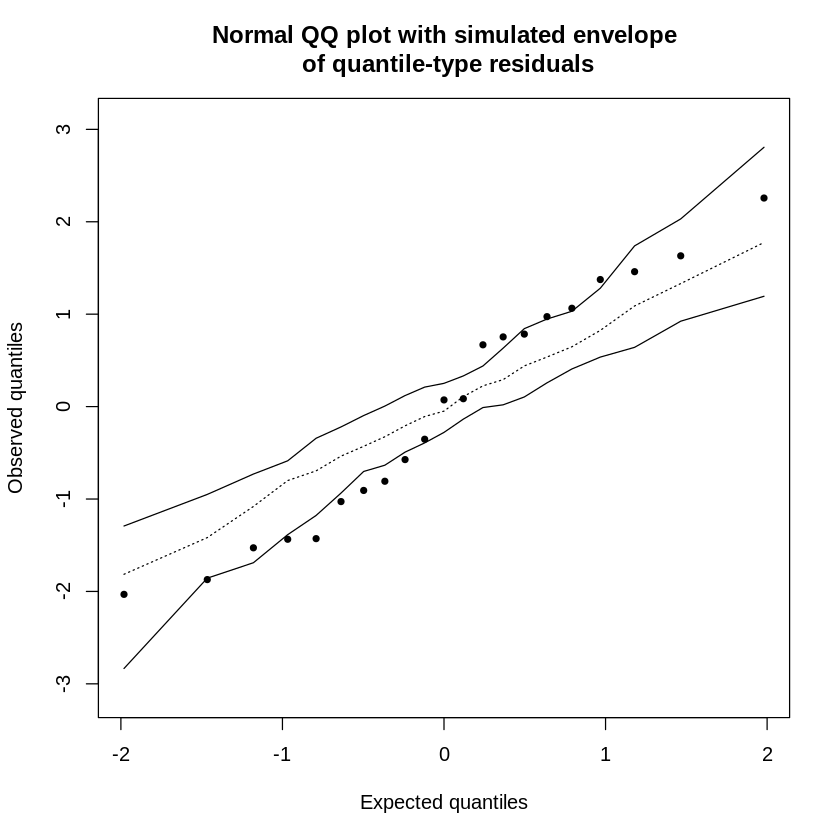

In [41]:
set.seed(24102022)
glmtoolbox::envelope(fit)

**(C)** Ajuste a los datos modelos de respuestas BB y RCB con función de enlace $\texttt{logit}$ y el predictor lineal dado por $1 + \texttt{specie} + \texttt{extract} + \texttt{specie*extract}$. Use los criterios AIC y BIC para comparar y seleccionar uno de estos dos modelos. Compare las estimaciones de sus parámetros y los errores estándar asociados a ellas con las obtenidas en **(B)**. Comente.

In [42]:
fit1 <- glmtoolbox::overglm(cbind(germinated,seeds-germinated) ~ specie + extract + specie*extract, 
                family="bb(logit)", data=orobanche)
fit2 <- glmtoolbox::overglm(cbind(germinated,seeds-germinated) ~ specie + extract + specie*extract,
                family="rcb(logit)", data=orobanche)

AIC(fit1, fit2)
BIC(fit1, fit2)

,df,AIC
fit1,5,117.5335
fit2,5,116.0956


,df,BIC
fit1,5,122.7561
fit2,5,121.3182


In [43]:
summary(fit2)


Sample size: 21 
     Family: Random-clumped Binomial with logit link
*************************************************************
                                    Estimate Std.Error  z-value Pr(>|z|)
(Intercept)                         -0.46619   0.22490 -2.07286 0.038185
specieAegyptiaca 75                 -0.07681   0.28019 -0.27413 0.783983
extractCucumber                      0.51140   0.30814  1.65963 0.096989
specieAegyptiaca 75:extractCucumber  0.83610   0.38484  2.17259 0.029811
                                                                        
phi                                  0.13290   0.04665                  
*************************************************************
                 -2*log-likelihood:  106.096 
                               AIC:  116.096 
                               BIC:  121.318 


In [44]:
tbl4 = summary(fit)$coefficients[,1:2]  %>% as.data.frame() %>% 
    rename(c("Coef_Bin"=Estimate, "SE_Bin"=`Std. Error`)) %>% 
    mutate("Coef_RCB"=coefficients(fit2), 
           "SE_RCB" = sqrt(diag(vcov(fit2))),
           "Delta coef(%)" = 100*((Coef_RCB-Coef_Bin)/abs(Coef_Bin)),
           "Delta SE(%)" = 100*((SE_RCB-SE_Bin)/abs(SE_Bin))) %>% round(.,3)
tbl4
#kable(tbl4,format = 'latex')

,Coef_Bin,SE_Bin,Coef_RCB,SE_RCB,Delta coef(%),Delta SE(%)
(Intercept),-0.412,0.184,-0.466,0.225,-13.086,22.111
specieAegyptiaca 75,-0.146,0.223,-0.077,0.280,47.365,25.552
extractCucumber,0.540,0.250,0.511,0.308,-5.309,23.349
specieAegyptiaca 75:extractCucumber,0.778,0.306,0.836,0.385,7.453,25.587


**(D)** Realice el análisis de diagnóstico al modelo seleccionado en **(C)**. Comente.